<a href="https://colab.research.google.com/github/tanpeep/SejahteraML/blob/main/Capstone_model_prakerja_kur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library Here

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Data Preprocessing

**Dataset Description**

Feature:
*   pekerjaan: Pekerjaan Kepala Keluarga
*   status_pekerjaan: Status Pekerjaan Kepala Keluarga
*   pendidikan: Pendidikan Kepala Keluarga
*   status_kawin: Status Kawin Kepala Keluarga
*   rumah: Kepemilikan Rumah
*   simpanan: Memiliki simpanan uang/perhiasan/ternak/dll.
*   jenis_atap
*   kualitas_atap
*   jenis_dinding
*   kualitas_dinding
*   jenis_lantai
*   kualitas_lantai
*   sumber_penerangan
*   daya_listrik: daya listrik terpasang pada tempat tinggal, 1: > 900 watt, 0: =< 900 watt
*   bahan_bakar_masak
*   air_minum
*   fasilitas_bab
*   stunting

Label:
*   bpnt: penerima bantuan pangan non tunai
*   bpum: penerima bantuan produktif usaha mikro
*   bst: penerima bantuan sosial tunai
*   pkh: penerima program keluarga harapan
*   sembako: bantuan sembako
*   prakerja: penerima prakerja
*   kur: bantuan kredit usaha rakyat





## Useful function

In [ ]:
# feature is in a list format
def one_hot_encode(df, feature):
  one_hot = pd.get_dummies(df, columns = feature)
  df = df.drop(feature, axis = 1)
  df = df.join(one_hot)
  return df

In [ ]:
def label_encode(df, features):
  for feature in features:
    label_encoder = LabelEncoder()
    label_encoder.fit(df[feature])
    df[feature] = label_encoder.transform(df[feature])
  return df

## Open and clean data

In [ ]:
# Load the dataset
df = pd.read_csv('hasil2.csv')

df.head(10)

,pekerjaan,status_pekerjaan,pendidikan,status_kawin,rumah,simpanan,jenis_atap,kualitas_atap,jenis_dinding,kualitas_dinding,...,air_minum,fasilitas_bab,stunting,bpnt,bpum,bst,pkh,sembako,prakerja,kur
0,petani,pekerja_bebas,tdk_tamat_sd,kawin,pribadi,ya,beton,NaN,tembok,NaN,...,air_kemasan,pribadi,bukan_target,tidak,ya,tidak,tidak,tidak,tidak,tidak
1,nelayan,usaha_sendiri,tamat_sltp,kawin,pribadi,NaN,seng,rendah,tembok,rendah,...,air_kemasan,pribadi,tidak_beresiko,ya,tidak,tidak,tidak,tidak,tidak,tidak
2,pekerja_lepas,usaha_sendiri,tamat_slta,kawin,pribadi,NaN,seng,tinggi,tembok,tinggi,...,air_kemasan,pribadi,tidak_beresiko,ya,tidak,ya,ya,ya,tidak,tidak
3,tidak_bekerja,tidak_bekerja,tamat_sd,cerai_mati,menumpang,ya,seng,rendah,tembok,rendah,...,air_kemasan,pribadi,bukan_target,ya,tidak,ya,tidak,ya,tidak,tidak
4,pekerja_lepas,usaha_sendiri,tamat_sd,cerai_mati,menumpang,NaN,seng,rendah,tembok,rendah,...,air_kemasan,pribadi,bukan_target,tidak,tidak,tidak,tidak,tidak,tidak,tidak
5,pekerja_lepas,usaha_sendiri,tamat_slta,cerai_hidup,pribadi,NaN,seng,tinggi,tembok,tinggi,...,air_kemasan,pribadi,bukan_target,ya,tidak,ya,ya,ya,tidak,ya
6,petani,usaha_sendiri,tamat_sd,kawin,pribadi,NaN,seng,rendah,tembok,rendah,...,air_kemasan,pribadi,beresiko,ya,tidak,ya,ya,ya,tidak,tidak
7,petani,usaha_sendiri,tdk_tamat_sd,kawin,pribadi,NaN,seng,tinggi,tembok,tinggi,...,air_kemasan,pribadi,tidak_beresiko,tidak,tidak,tidak,tidak,tidak,tidak,tidak
8,pegawai_swasta,buruh_karyawan_pegawai,tamat_slta,kawin,menumpang,NaN,seng,rendah,kayu,rendah,...,air_kemasan,pribadi,beresiko,tidak,tidak,tidak,tidak,tidak,tidak,tidak
9,pegawai_swasta,buruh_karyawan_pegawai,tamat_slta,kawin,pribadi,NaN,seng,tinggi,tembok,tinggi,...,air_kemasan,pribadi,tidak_beresiko,tidak,tidak,tidak,tidak,tidak,tidak,tidak


In [ ]:
df['simpanan'].unique()

array(['ya', nan, 'tidak'], dtype=object)

In [ ]:
for label in df.columns:
  print(df[label].unique())

['petani' 'nelayan' 'pekerja_lepas' 'tidak_bekerja' 'pegawai_swasta'
 'pensiunan' 'wiraswasta' 'pedagang' 'asn' 'pejabat_negara']
['pekerja_bebas' 'usaha_sendiri' 'tidak_bekerja' 'buruh_karyawan_pegawai'
 'usaha_dibantu_buruh_tetap' 'usaha_dibantu_buruh_tdk_tetap' 'tdk_dibayar']
['tdk_tamat_sd' 'tamat_sltp' 'tamat_slta' 'tamat_sd' 'tidak_sekolah'
 'masih_slta' 'tamat_pt' 'masih_sltp' 'masih_sd' 'masih_pt']
['kawin' 'cerai_mati' 'cerai_hidup' 'belum_kawin']
['pribadi' 'menumpang' 'sewa' 'lainnya' 'dinas']
['ya' nan 'tidak']
['beton' 'seng' 'genteng' 'kayu' 'lainnya' 'dedaunan']
[nan 'rendah' 'tinggi']
['tembok' 'kayu' 'lainnya' 'bambu' 'seng']
[nan 'rendah' 'tinggi']
['semen' 'kayu' 'ubin' 'lainnya' 'tanah' 'bambu']
[nan 'rendah' 'tinggi']
['pln_meteran' 'pln_non_meteran' 'bukan_listrik']
['ya' 'tidak' nan]
['listrik_gas' 'minyak_tanah' 'lainnya' 'arang_kayu']
['air_kemasan' 'sumur_terlindung' 'pam' 'air_permukaan'
 'sumur_tdk_terlindung' 'air_hujan' 'sumur_bor' 'lainnya']
['pribadi' 'l

In [ ]:
# Define feature and target attribute
target_attr = ['bpnt', 'bpum', 'bst', 'pkh', 'sembako', 'prakerja', 'kur']
feature_attr = list(set(df.columns) - set(target_attr))

In [ ]:
df.info()
# df['air_minum'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4560 entries, 0 to 4559
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   pekerjaan          4560 non-null   object
 1   status_pekerjaan   4560 non-null   object
 2   pendidikan         4560 non-null   object
 3   status_kawin       4560 non-null   object
 4   rumah              4560 non-null   object
 5   simpanan           1817 non-null   object
 6   jenis_atap         4560 non-null   object
 7   kualitas_atap      4258 non-null   object
 8   jenis_dinding      4560 non-null   object
 9   kualitas_dinding   4258 non-null   object
 10  jenis_lantai       4560 non-null   object
 11  kualitas_lantai    4258 non-null   object
 12  sumber_penerangan  4560 non-null   object
 13  daya_listrik       4474 non-null   object
 14  bahan_bakar_masak  4560 non-null   object
 15  air_minum          4560 non-null   object
 16  fasilitas_bab      4452 non-null   object


# Model Prakerja

In [ ]:
df_prakerja = df[['pekerjaan', 'status_pekerjaan', 'pendidikan', 'prakerja']]
df_prakerja

,pekerjaan,status_pekerjaan,pendidikan,prakerja
0,petani,pekerja_bebas,tdk_tamat_sd,tidak
1,nelayan,usaha_sendiri,tamat_sltp,tidak
2,pekerja_lepas,usaha_sendiri,tamat_slta,tidak
3,tidak_bekerja,tidak_bekerja,tamat_sd,tidak
4,pekerja_lepas,usaha_sendiri,tamat_sd,tidak
...,...,...,...,...
4555,nelayan,usaha_sendiri,tamat_sltp,tidak
4556,pekerja_lepas,pekerja_bebas,tamat_slta,tidak
4557,petani,usaha_sendiri,tamat_sd,tidak
4558,nelayan,usaha_sendiri,tamat_sd,tidak


In [ ]:
df_prakerja = label_encode(df_prakerja, ['prakerja'])
df_prakerja

<ipython-input-20-e488aed8a847>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = label_encoder.transform(df[feature])


,pekerjaan,status_pekerjaan,pendidikan,prakerja
0,petani,pekerja_bebas,tdk_tamat_sd,0
1,nelayan,usaha_sendiri,tamat_sltp,0
2,pekerja_lepas,usaha_sendiri,tamat_slta,0
3,tidak_bekerja,tidak_bekerja,tamat_sd,0
4,pekerja_lepas,usaha_sendiri,tamat_sd,0
...,...,...,...,...
4555,nelayan,usaha_sendiri,tamat_sltp,0
4556,pekerja_lepas,pekerja_bebas,tamat_slta,0
4557,petani,usaha_sendiri,tamat_sd,0
4558,nelayan,usaha_sendiri,tamat_sd,0


In [ ]:
df_prakerja_feature = df_prakerja[['pekerjaan', 'status_pekerjaan', 'pendidikan']]
df_prakerja_feature = one_hot_encode(df_prakerja_feature, df_prakerja_feature.columns)

In [ ]:
df_prakerja = df_prakerja.drop(['pekerjaan', 'status_pekerjaan', 'pendidikan'], axis='columns')
df_prakerja

,prakerja
0,0
1,0
2,0
3,0
4,0
...,...
4555,0
4556,0
4557,0
4558,0


In [ ]:
df_prakerja = df_prakerja.join(df_prakerja_feature)
df_prakerja

,prakerja,pekerjaan_asn,pekerjaan_nelayan,pekerjaan_pedagang,pekerjaan_pegawai_swasta,pekerjaan_pejabat_negara,pekerjaan_pekerja_lepas,pekerjaan_pensiunan,pekerjaan_petani,pekerjaan_tidak_bekerja,...,pendidikan_masih_pt,pendidikan_masih_sd,pendidikan_masih_slta,pendidikan_masih_sltp,pendidikan_tamat_pt,pendidikan_tamat_sd,pendidikan_tamat_slta,pendidikan_tamat_sltp,pendidikan_tdk_tamat_sd,pendidikan_tidak_sekolah
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4555,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4556,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4557,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4558,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
y = df_prakerja['prakerja']
X = df_prakerja.drop('prakerja', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation = 'relu'),
  tf.keras.layers.Dense(256, activation = 'relu'),
  tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
114/114 [==============================] - 2s 8ms/step - loss: 0.3453 - accuracy: 0.8939
Epoch 2/100
114/114 [==============================] - 1s 8ms/step - loss: 0.3388 - accuracy: 0.8939
Epoch 3/100
114/114 [==============================] - 1s 10ms/step - loss: 0.3341 - accuracy: 0.8939
Epoch 4/100
114/114 [==============================] - 1s 10ms/step - loss: 0.3370 - accuracy: 0.8939
Epoch 5/100
114/114 [==============================] - 1s 5ms/step - loss: 0.3328 - accuracy: 0.8939
Epoch 6/100
114/114 [==============================] - 1s 5ms/step - loss: 0.3341 - accuracy: 0.8939
Epoch 7/100
114/114 [==============================] - 1s 5ms/step - loss: 0.3327 - accuracy: 0.8939
Epoch 8/100
114/114 [==============================] - 1s 5ms/step - loss: 0.3321 - accuracy: 0.8939
Epoch 9/100
114/114 [==============================] - 1s 7ms/step - loss: 0.3324 - accuracy: 0.8939
Epoch 10/100
114/114 [==============================] - 1s 7ms/step - loss: 0.3319 - accu

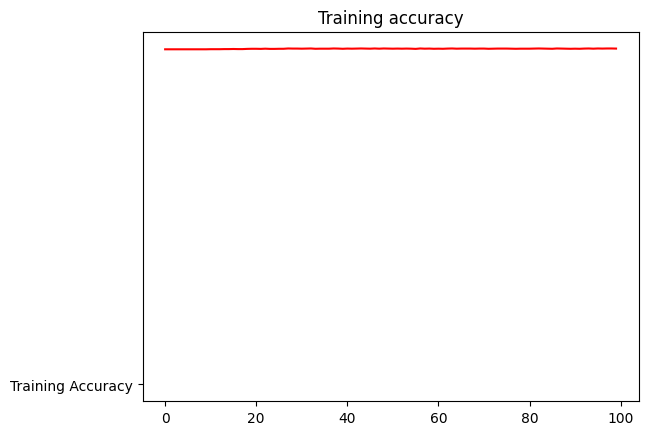

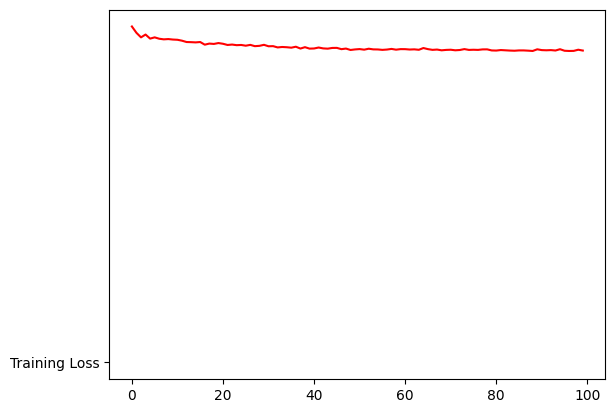

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
loss=history.history['loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.title('Training accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.show()

In [ ]:
y_pred = model.predict(X_test)

29/29 [==============================] - 0s 3ms/step


In [ ]:
y_pred = (y_pred>0.5).astype(int)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Akurasi:", accuracy)
print("Laporan Klasifikasi:\n", report)

Akurasi: 0.893640350877193
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.90      1.00      0.94       817
           1       0.25      0.01      0.02        95

    accuracy                           0.89       912
   macro avg       0.57      0.50      0.48       912
weighted avg       0.83      0.89      0.85       912



In [ ]:
!mkdir -p saved_model
model.save('saved_model/model_prakerja')

In [ ]:
# model.save('model_prakerja.h5')

# Model KUR

In [ ]:
df_kur = df[['pekerjaan', 'status_pekerjaan', 'simpanan', 'kur']]
df_kur

,pekerjaan,status_pekerjaan,simpanan,kur
0,petani,pekerja_bebas,ya,tidak
1,nelayan,usaha_sendiri,NaN,tidak
2,pekerja_lepas,usaha_sendiri,NaN,tidak
3,tidak_bekerja,tidak_bekerja,ya,tidak
4,pekerja_lepas,usaha_sendiri,NaN,tidak
...,...,...,...,...
4555,nelayan,usaha_sendiri,NaN,ya
4556,pekerja_lepas,pekerja_bebas,NaN,tidak
4557,petani,usaha_sendiri,NaN,tidak
4558,nelayan,usaha_sendiri,NaN,tidak


In [ ]:
df_kur['simpanan'] = df_kur['simpanan'].fillna('tidak')
df_kur

<ipython-input-41-3cb1f58e7662>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kur['simpanan'] = df_kur['simpanan'].fillna('tidak')


,pekerjaan,status_pekerjaan,simpanan,kur
0,petani,pekerja_bebas,ya,tidak
1,nelayan,usaha_sendiri,tidak,tidak
2,pekerja_lepas,usaha_sendiri,tidak,tidak
3,tidak_bekerja,tidak_bekerja,ya,tidak
4,pekerja_lepas,usaha_sendiri,tidak,tidak
...,...,...,...,...
4555,nelayan,usaha_sendiri,tidak,ya
4556,pekerja_lepas,pekerja_bebas,tidak,tidak
4557,petani,usaha_sendiri,tidak,tidak
4558,nelayan,usaha_sendiri,tidak,tidak


In [ ]:
df_kur = label_encode(df_kur, ['kur'])
df_kur

<ipython-input-20-e488aed8a847>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = label_encoder.transform(df[feature])


,pekerjaan,status_pekerjaan,simpanan,kur
0,petani,pekerja_bebas,ya,0
1,nelayan,usaha_sendiri,tidak,0
2,pekerja_lepas,usaha_sendiri,tidak,0
3,tidak_bekerja,tidak_bekerja,ya,0
4,pekerja_lepas,usaha_sendiri,tidak,0
...,...,...,...,...
4555,nelayan,usaha_sendiri,tidak,1
4556,pekerja_lepas,pekerja_bebas,tidak,0
4557,petani,usaha_sendiri,tidak,0
4558,nelayan,usaha_sendiri,tidak,0


In [ ]:
df_kur = label_encode(df_kur, ['simpanan'])
df_kur

<ipython-input-20-e488aed8a847>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = label_encoder.transform(df[feature])


,pekerjaan,status_pekerjaan,simpanan,kur
0,petani,pekerja_bebas,1,0
1,nelayan,usaha_sendiri,0,0
2,pekerja_lepas,usaha_sendiri,0,0
3,tidak_bekerja,tidak_bekerja,1,0
4,pekerja_lepas,usaha_sendiri,0,0
...,...,...,...,...
4555,nelayan,usaha_sendiri,0,1
4556,pekerja_lepas,pekerja_bebas,0,0
4557,petani,usaha_sendiri,0,0
4558,nelayan,usaha_sendiri,0,0


In [ ]:
df_kur_feature = df_kur[['pekerjaan', 'status_pekerjaan']]
df_kur_feature = one_hot_encode(df_kur_feature, df_kur_feature.columns)
df_kur = df_kur.drop(['pekerjaan', 'status_pekerjaan'], axis='columns')
df_kur = df_kur.join(df_kur_feature)
df_kur

,simpanan,kur,pekerjaan_asn,pekerjaan_nelayan,pekerjaan_pedagang,pekerjaan_pegawai_swasta,pekerjaan_pejabat_negara,pekerjaan_pekerja_lepas,pekerjaan_pensiunan,pekerjaan_petani,pekerjaan_tidak_bekerja,pekerjaan_wiraswasta,status_pekerjaan_buruh_karyawan_pegawai,status_pekerjaan_pekerja_bebas,status_pekerjaan_tdk_dibayar,status_pekerjaan_tidak_bekerja,status_pekerjaan_usaha_dibantu_buruh_tdk_tetap,status_pekerjaan_usaha_dibantu_buruh_tetap,status_pekerjaan_usaha_sendiri
0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4555,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4556,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4557,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4558,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
y = df_kur['kur']
X = df_kur.drop('kur', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation = 'relu'),
  tf.keras.layers.Dense(256, activation = 'relu'),
  tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history2 = model2.fit(X_train, y_train, epochs=100)

Epoch 1/100
114/114 [==============================] - 2s 8ms/step - loss: 0.4337 - accuracy: 0.8372
Epoch 2/100
114/114 [==============================] - 1s 7ms/step - loss: 0.4225 - accuracy: 0.8429
Epoch 3/100
114/114 [==============================] - 1s 5ms/step - loss: 0.4227 - accuracy: 0.8429
Epoch 4/100
114/114 [==============================] - 1s 6ms/step - loss: 0.4217 - accuracy: 0.8429
Epoch 5/100
114/114 [==============================] - 1s 8ms/step - loss: 0.4222 - accuracy: 0.8429
Epoch 6/100
114/114 [==============================] - 1s 6ms/step - loss: 0.4209 - accuracy: 0.8429
Epoch 7/100
114/114 [==============================] - 1s 6ms/step - loss: 0.4196 - accuracy: 0.8429
Epoch 8/100
114/114 [==============================] - 1s 6ms/step - loss: 0.4191 - accuracy: 0.8429
Epoch 9/100
114/114 [==============================] - 1s 6ms/step - loss: 0.4204 - accuracy: 0.8429
Epoch 10/100
114/114 [==============================] - 1s 6ms/step - loss: 0.4203 - accura

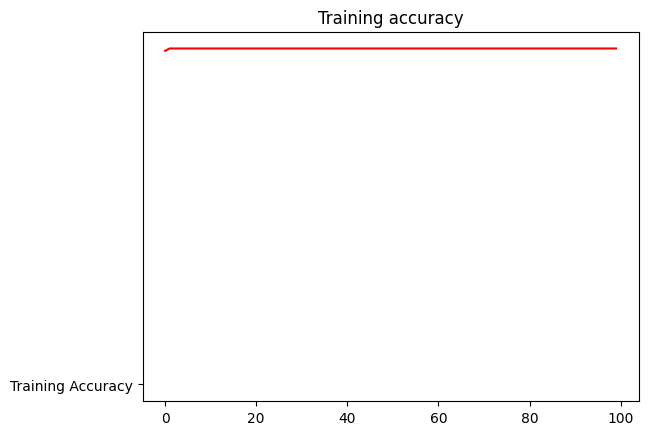

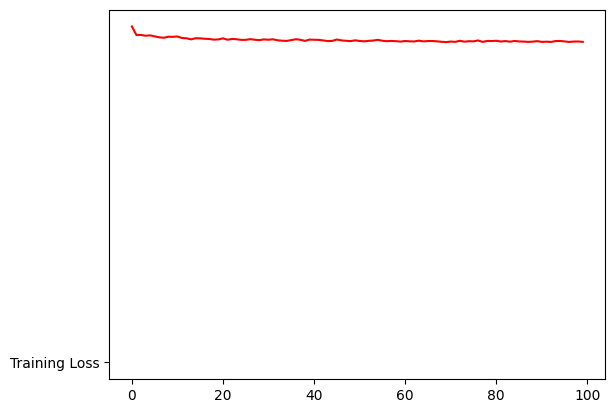

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history2.history['accuracy']
loss=history2.history['loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.title('Training accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.show()

In [ ]:
y_pred = model2.predict(X_test)

29/29 [==============================] - 0s 4ms/step


In [ ]:
y_pred = (y_pred>0.5).astype(int)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Akurasi:", accuracy)
print("Laporan Klasifikasi:\n", report)

Akurasi: 0.8289473684210527
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       756
           1       0.00      0.00      0.00       156

    accuracy                           0.83       912
   macro avg       0.41      0.50      0.45       912
weighted avg       0.69      0.83      0.75       912



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
!mkdir -p saved_model
model.save('saved_model/model_kur')

In [ ]:
# model2.save('model_kur.h5')

In [ ]:
# from google.colab import files
# files.download('model_prakerja.h5')
# files.download('model_kur.h5')